## Google Data Analytics Case 1: Cyclistic
- by Kongsakun Panyang
- Email: balliolon@gmail.com
- LinkedIn: www.linkedin.com/in/kongsakun-panyang-b35029230
- GitHub: https://github.com/balliolon2

## Introduction
- This project is a part of "Google Data Analytics" course on Coursera.
- Follow to Google Data Analytics processes
  - Asking, Preparing, Processing, Analysis, Sharing, Acting

## Asking
- #### Scenario
  - You are a junior data analyst 
  - working in the marketing analyst team 
    - at Cyclistic, a bike-share company in Chicago
  - Director of marketing
    - the company’s future success 
      - depends on maximizing the number of annual memberships
  - Task
    - design a new marketing strategy 
      - to convert casual riders into annual members
- #### Problem
  - How to increase the number of annual members?
- #### Question
  - What are factors that increase the number of annual members?
  - How to design?

## Preparing
- #### Resource
  - Open data
    - https://divvy-tripdata.s3.amazonaws.com/index.html
- #### How they are organized
  - date
- #### Bias?
  - No
    - datas are come from users 
        - might be automatically recored
- #### ROCCC?
  - Yes
  - reliable, original, comprehensive, current, & cited

## Processing
- Organize data by Python
- Data visualize by Python, Tableau

#### Import Libraries and datas

In [1]:
import numpy as np # for linear algebra and operation
import pandas as pd # for dataframe
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from collections import Counter # for count value
%matplotlib inline

In [2]:
#import files
data_m1 = pd.read_csv('202101-divvy-tripdata.csv')
data_m2 = pd.read_csv('202102-divvy-tripdata.csv')
data_m3 = pd.read_csv('202103-divvy-tripdata.csv')
data_m4 = pd.read_csv('202104-divvy-tripdata.csv')
data_m5 = pd.read_csv('202105-divvy-tripdata.csv')
data_m6 = pd.read_csv('202106-divvy-tripdata.csv')
data_m7 = pd.read_csv('202107-divvy-tripdata.csv')
data_m8 = pd.read_csv('202108-divvy-tripdata.csv')
data_m9 = pd.read_csv('202109-divvy-tripdata.csv')
data_m10 = pd.read_csv('202110-divvy-tripdata.csv')
data_m11 = pd.read_csv('202111-divvy-tripdata.csv')
data_m12 = pd.read_csv('202112-divvy-tripdata.csv')

#### Concatenate dataframes

In [3]:
data_2021 = pd.concat([data_m1,data_m2,data_m3,data_m4,data_m5,data_m6,data_m7,data_m8,data_m9,data_m10,data_m11,data_m12])

In [4]:
data_2021.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.7200,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.6900,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.7000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.6900,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.7000,casual
5,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,NaN,NaN,41.900409,-87.696763,41.940000,-87.7100,casual
6,09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,California Ave & Cortez St,17660,NaN,NaN,41.900391,-87.696757,41.900000,-87.7100,member
7,DF7A32A217AEFB14,electric_bike,2021-01-14 15:07:00,2021-01-14 15:13:40,California Ave & Cortez St,17660,NaN,NaN,41.900390,-87.696728,41.910000,-87.7000,member
8,C2EFC62379EB716C,electric_bike,2021-01-09 09:57:55,2021-01-09 10:00:26,California Ave & Cortez St,17660,NaN,NaN,41.900306,-87.696796,41.900000,-87.7000,member
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.6722,member


In [5]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


Change data type of started_at & ended_at to date

In [6]:
data_2021['started_at'] = pd.to_datetime(data_2021['started_at'], format = '%Y-%m-%d %H:%M:%S')
data_2021['ended_at'] = pd.to_datetime(data_2021['ended_at'], format = '%Y-%m-%d %H:%M:%S')

In [7]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 597.6+ MB


In [8]:
#checking NULL data
pd.isnull(data_2021).sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

In [9]:
#drop duplication rows
data_2021 = data_2021.drop_duplicates()

#### Create new columns
Before visualize
 - I need to show first
     - member: casual vs member
 - Factors that I need to show
     - date (by month)
     - date (by weekday)
     - date (by hours in a day) + facet_wrap() each weekday
     - time to use
     - type of bike

In [10]:
# create new column "month"
data_2021['month'] = data_2021['started_at'].apply(lambda x: x.month) 
# using .apply(lambda x: x.month) for separating %m from %Y-%m-%d

In [11]:
# create new column "weekday" by showing Sunday, Monday etc.
data_2021['weekday'] = data_2021['started_at'].apply(lambda x: x.strftime('%A'))
# using apply(lambda x: x.strftime('%A')) for separating %m from %Y-%m-%d and change values to "Sunday", "Monday" etc.

In [12]:
# create new column "start_hr"
data_2021['start_hr'] = data_2021['started_at'].apply(lambda x: x.hour)

In [13]:
# create new column "end_hr"
data_2021['end_hr'] = data_2021['ended_at'].apply(lambda x: x.hour)

In [14]:
# create new column "time_to_use"
data_2021['time_to_use'] = data_2021['ended_at'] - data_2021['started_at']

In [15]:
data_2021.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,weekday,start_hr,end_hr,time_to_use
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.7200,member,1,Saturday,16,16,0 days 00:10:25
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.6900,member,1,Wednesday,18,18,0 days 00:04:04
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.7000,member,1,Thursday,22,22,0 days 00:01:20
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.6900,member,1,Thursday,13,13,0 days 00:11:42
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.7000,casual,1,Saturday,2,2,0 days 00:00:43
5,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,NaN,NaN,41.900409,-87.696763,41.940000,-87.7100,casual,1,Saturday,14,15,0 days 00:53:47
6,09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,California Ave & Cortez St,17660,NaN,NaN,41.900391,-87.696757,41.900000,-87.7100,member,1,Monday,5,5,0 days 00:05:35
7,DF7A32A217AEFB14,electric_bike,2021-01-14 15:07:00,2021-01-14 15:13:40,California Ave & Cortez St,17660,NaN,NaN,41.900390,-87.696728,41.910000,-87.7000,member,1,Thursday,15,15,0 days 00:06:40
8,C2EFC62379EB716C,electric_bike,2021-01-09 09:57:55,2021-01-09 10:00:26,California Ave & Cortez St,17660,NaN,NaN,41.900306,-87.696796,41.900000,-87.7000,member,1,Saturday,9,10,0 days 00:02:31
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.6722,member,1,Sunday,19,19,0 days 00:07:13


In [ ]:
# Saving csv files if want to use with other
data_2021.to_csv('data_2021.csv', index=False)

## Analysis

#### casual vs member

In [16]:
# count member_casual
counts = Counter(data_2021['member_casual'])
counts

Counter({'member': 3066058, 'casual': 2529005})

<AxesSubplot:xlabel='member_casual', ylabel='count'>

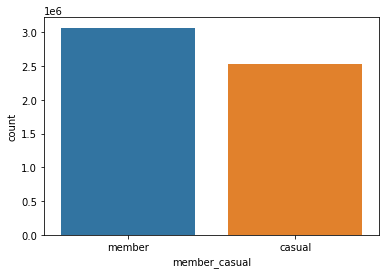

In [17]:
sns.countplot(x='member_casual', data=data_2021)

According to this plot
- the number of member is greater than the number of casual

### Factors that I need to show

##### Date by month

In [18]:
# count member_casual
counts = Counter(data_2021['month'])
counts

Counter({1: 96834,
         2: 49622,
         3: 228496,
         4: 337230,
         5: 531633,
         6: 729595,
         7: 822410,
         8: 804352,
         9: 756147,
         10: 631226,
         11: 359978,
         12: 247540})

In [59]:
data_2021['month'].describe()

count    5.595063e+06
mean     7.418277e+00
std      2.492260e+00
min      1.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.200000e+01
Name: month, dtype: float64

<AxesSubplot:xlabel='month', ylabel='count'>

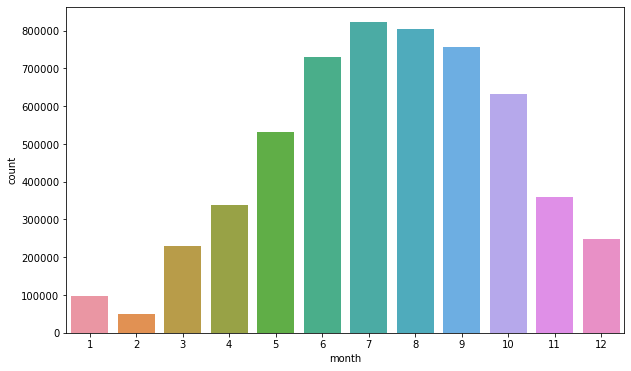

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=data_2021)

<AxesSubplot:xlabel='month', ylabel='count'>

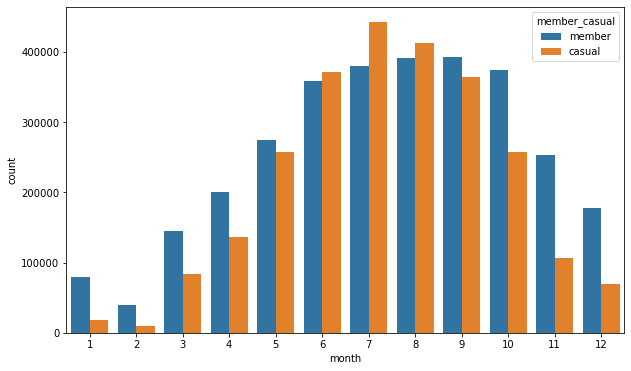

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=data_2021, hue='member_casual')

In my opinion
- the number of bike user is significantly increased at 3rd month (March)
    - Then it is significantly decreased at 11th month (November)

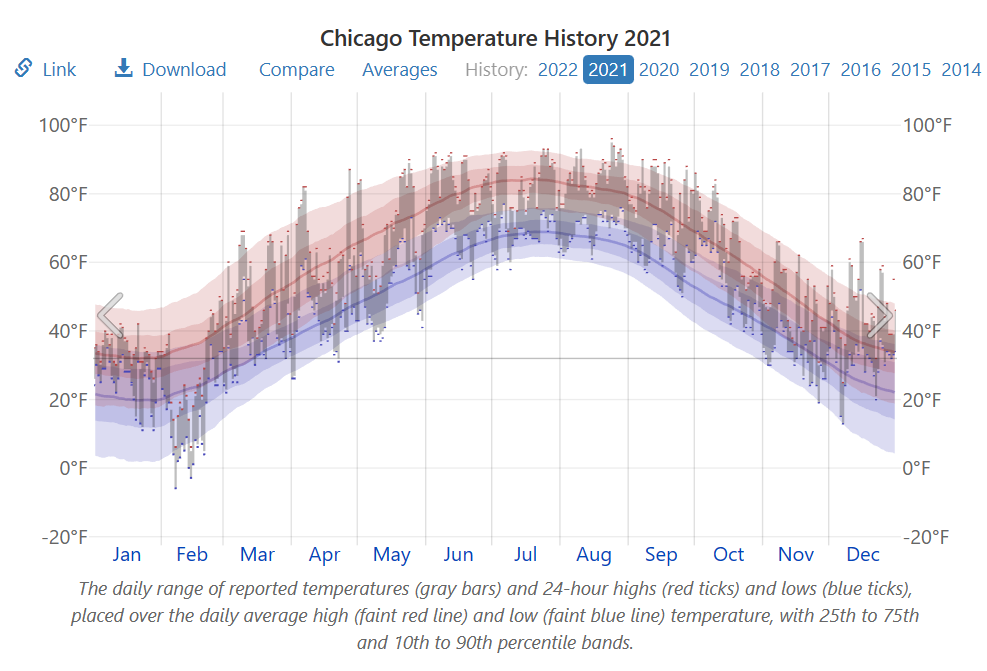

Resource: https://weatherspark.com/h/y/14091/2021/Historical-Weather-during-2021-in-Chicago-Illinois-United-States
- On March, Chicago temp was increased
- the month that has high temp would increase the number of bike user 
#### Conclusion, the temperature and the bike users have correlation each other 

In my opinion
- In the high temp month
    - the number of casual bike user is increased more than the number of member bike user
- people might prefer casual bike to member bike when they want to
    - bike for exercise
    - bike for chilling
    - what are reason?
        - user can set the bike manually?
        - the member bike is not comfortable as casual bike?
        
#### In conclusion, people prefer the casual bike when they want to ride for chilling or exercise

#### date by weekday

In [21]:
counts = Counter(data_2021['weekday'])
counts

Counter({'Saturday': 991047,
         'Wednesday': 756142,
         'Thursday': 737588,
         'Monday': 702588,
         'Sunday': 857285,
         'Friday': 810508,
         'Tuesday': 739905})

In [60]:
data_2021['weekday'].describe()

count      5595063
unique           7
top       Saturday
freq        991047
Name: weekday, dtype: object

<AxesSubplot:xlabel='weekday', ylabel='count'>

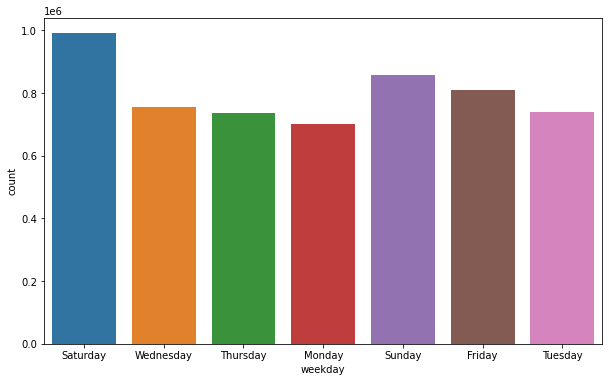

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=data_2021)

I need to sort the weekday by order in the week

In [23]:
data_2021['weekday'] = pd.Categorical(data_2021['weekday'], 
                                      categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                      ordered=True)

<AxesSubplot:xlabel='weekday', ylabel='count'>

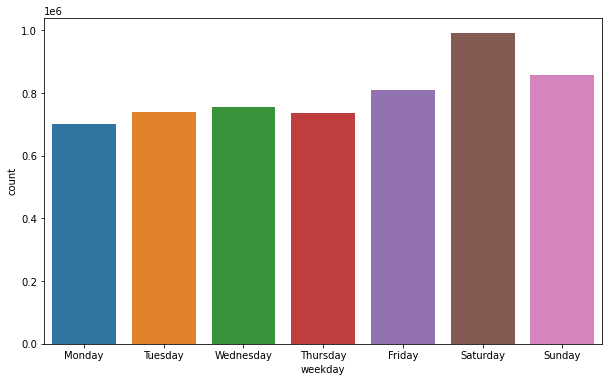

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=data_2021)

<AxesSubplot:xlabel='weekday', ylabel='count'>

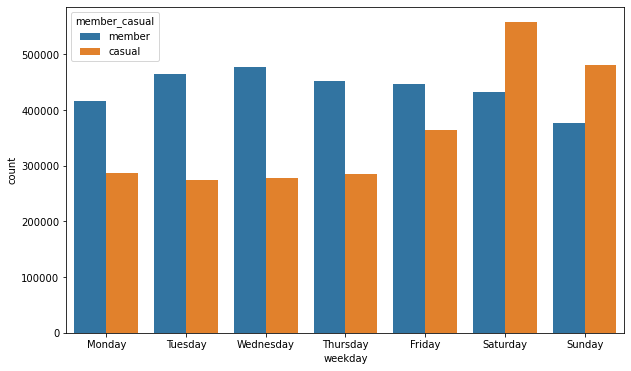

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=data_2021, hue='member_casual')

In my opinion
- Normally, Monday to Friday are the working day while Saturday and Sunday are the vacation day
- on the working day, people prefer member bike to casual bike
    - what does it mean?
        - the member bike is easy to use in the rush hour?
        - people just do not want to show their own bike when they go to work for some reason?
- on the vacation day, people prefer casual bike to member bike
    - what does it mean?
        - like an above reason that I said, for chilling or exercise
        
#### In conclusion, the working day and the vacation day have correlation with the number of member bike users

#### date by hours in a day + facet_wrap() each weekday

In [26]:
counts = Counter(data_2021['start_hr'])
counts

Counter({16: 462833,
         18: 485262,
         22: 170894,
         13: 351334,
         2: 38020,
         14: 353200,
         5: 42586,
         15: 389702,
         9: 207021,
         19: 360584,
         12: 342730,
         10: 233941,
         11: 291243,
         7: 196402,
         8: 236778,
         21: 201009,
         1: 61198,
         20: 253743,
         0: 87051,
         17: 556837,
         23: 125785,
         6: 107574,
         4: 18098,
         3: 21238})

In [61]:
data_2021['start_hr'].describe()

count    5.595063e+06
mean     1.424177e+01
std      5.052284e+00
min      0.000000e+00
25%      1.100000e+01
50%      1.500000e+01
75%      1.800000e+01
max      2.300000e+01
Name: start_hr, dtype: float64

<AxesSubplot:xlabel='start_hr', ylabel='count'>

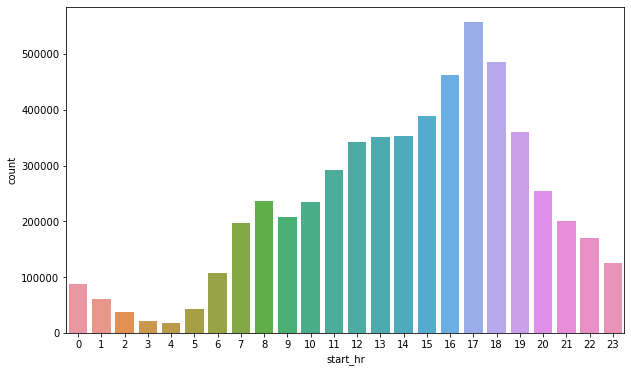

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='start_hr', data=data_2021)

<AxesSubplot:xlabel='start_hr', ylabel='count'>

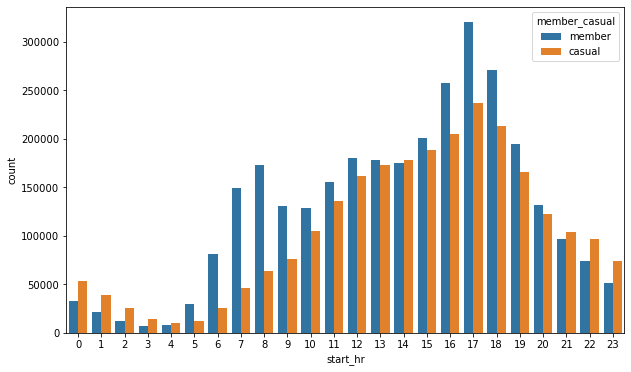

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='start_hr', data=data_2021, hue='member_casual')

<Figure size 720x432 with 0 Axes>

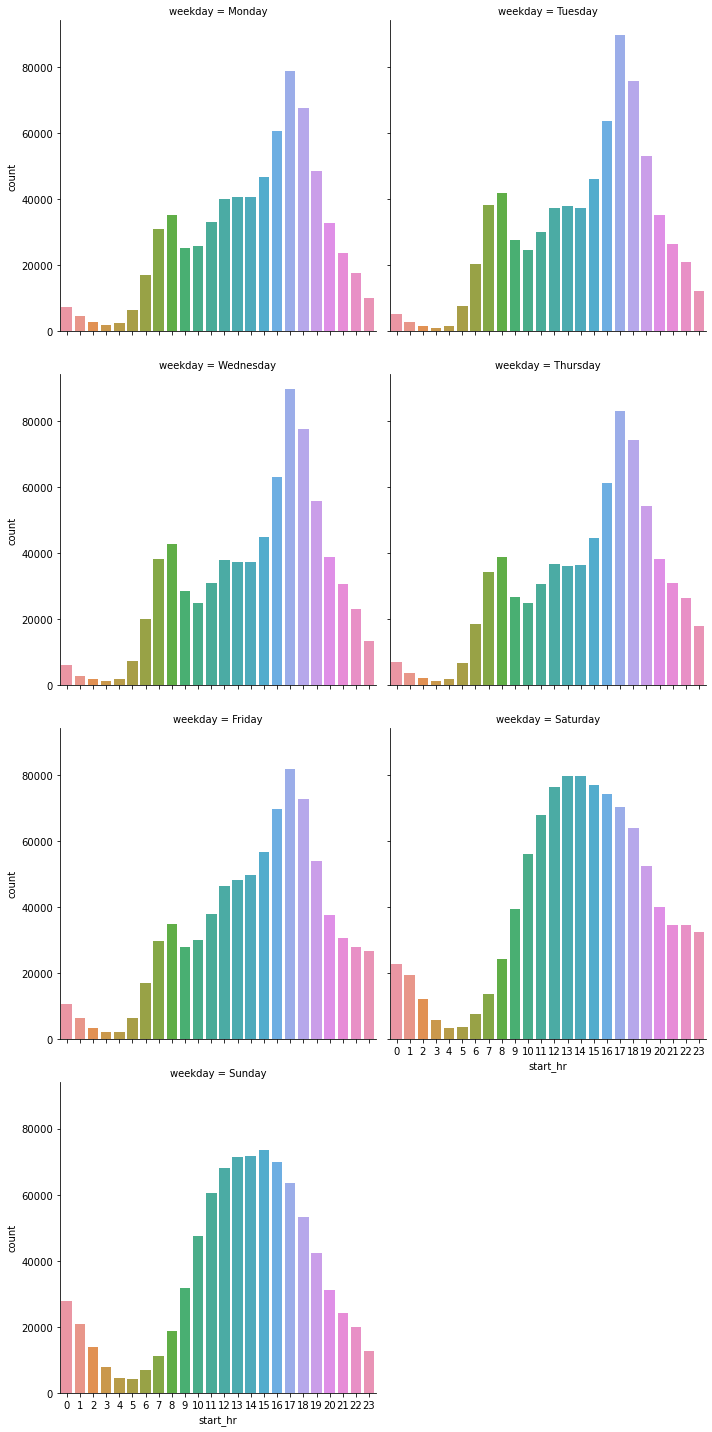

In [29]:
#create multiple plot like facet wrap in R
plt.figure(figsize=(10, 6))
sns.catplot(x='start_hr', col='weekday', kind='count', data=data_2021, col_wrap=2)

<Figure size 720x432 with 0 Axes>

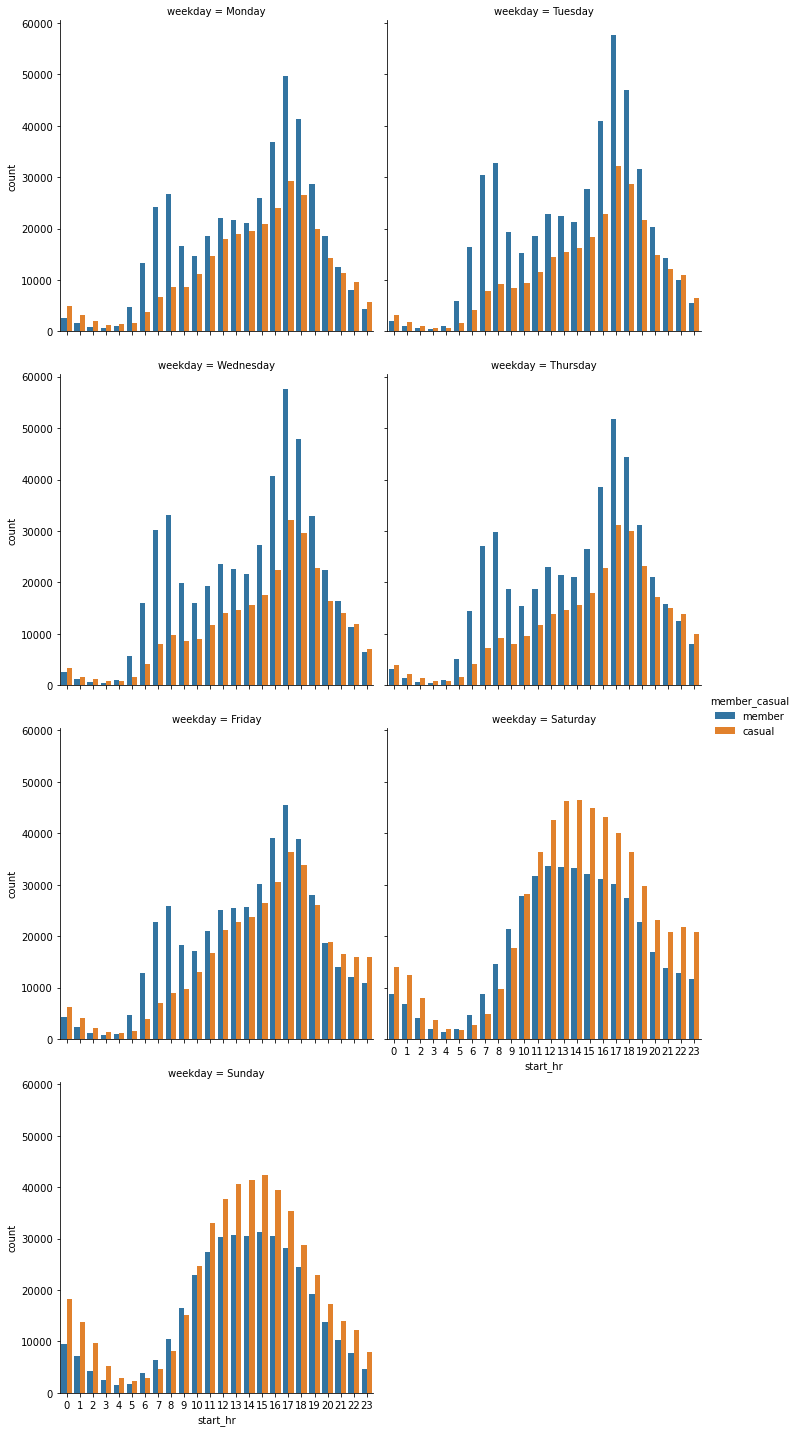

In [30]:
plt.figure(figsize=(10, 6))
sns.catplot(x='start_hr', col='weekday', kind='count', data=data_2021, col_wrap=2, hue='member_casual')

In my opinion
- On the working day
    - the number of bike user is significantly increased around 7 o'clock
        - especially the member bike
        - 7 o'clock is the time for going to work
    - the number of bike user is significantly increased around 17 o'clock
        - especially the member bike
        - 17 o'clock is the time to back to their home
- On the vacation day
    - the number of casual bike user is greater than the number member bike users
    - people like to use the bike around 9 o'clock to 20 o'clock

#### time to use

I need to convert time_to_use to minute unit

In [31]:
# using timedelta.total_seconds() to convert time to second unit
data_2021['time_to_use'] = data_2021['time_to_use'].dt.total_seconds() / 60

<AxesSubplot:xlabel='time_to_use', ylabel='member_casual'>

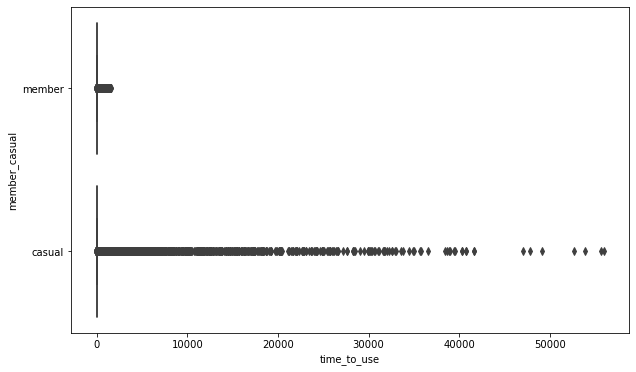

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_to_use', y='member_casual', data=data_2021)

I suppose they are error or might be the accident when the team gathers data

In [35]:
# using statistics to describe
mean_group = data_2021.groupby('member_casual')['time_to_use'].mean()
mean_group

member_casual
casual    32.000947
member    13.632841
Name: time_to_use, dtype: float64

In [63]:
statistic_group = data_2021.groupby('member_casual')['time_to_use'].describe()
statistic_group

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2529005.0,32.000947,263.143954,-58.033333,9.066667,15.966667,29.283333,55944.150000
member,3066058.0,13.632841,27.705804,-54.083333,5.566667,9.600000,16.600000,1559.933333


#### Because of many of error in the time to use section
- I might ignore about time to use
    - so when we need to present, I might do not include this part
- to clean this part
    - we should ask subject matter experts about proper range

#### type of bike

In [54]:
# count member_casual
counts = data_2021.groupby(['rideable_type','member_casual']).size()
counts

rideable_type  member_casual
classic_bike   casual           1266657
               member           1984371
docked_bike    casual            312342
               member                 1
electric_bike  casual            950006
               member           1081686
dtype: int64

In [55]:
# change appearance to unstack appearance
counts = counts.unstack()
counts = counts.reindex(['classic_bike', 'docked_bike', 'electric_bike'])
counts

member_casual,casual,member
rideable_type,,
classic_bike,1266657,1984371
docked_bike,312342,1
electric_bike,950006,1081686


<AxesSubplot:xlabel='rideable_type', ylabel='count'>

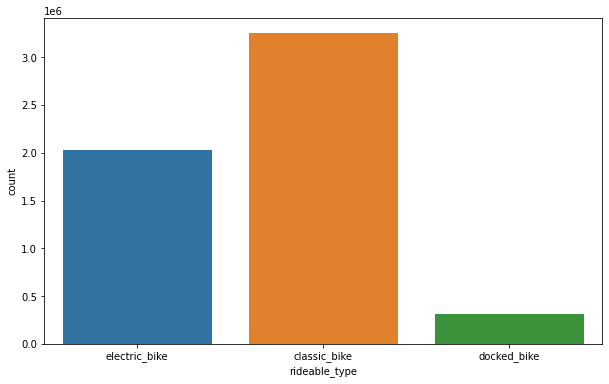

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rideable_type', data=data_2021)

<AxesSubplot:xlabel='rideable_type', ylabel='count'>

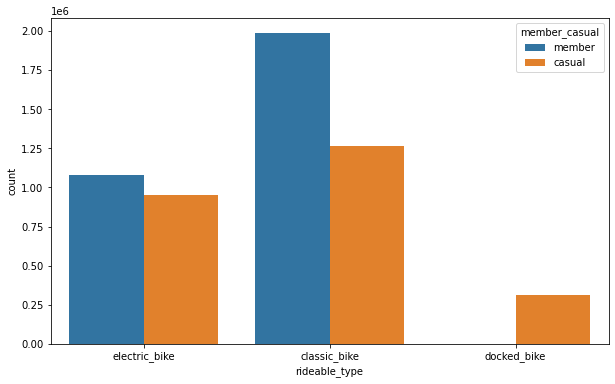

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rideable_type', data=data_2021, hue='member_casual')

After try to sort + filter on csv file by using Exel
- I found that the docked bike for member is actual only 1!
    - It might because Cyclistic cancle the docked bike model?

According to above chart
- people are using classic bike most of all of 3 types
- member bikes do not have docked bike (only have 1)

## Sharing

#### How to share
- Presentation
    - create with canvas
    - create dashboard with tableau
    - ipykernel
- Platform
    - GitHub (Exactly)
    - Tableau : https://public.tableau.com/views/GoogleDataAnalyticsCase1/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

#### What do I get from this
- Correlation
    - temp & the number of bike user
        - high temp month -> high the number of bike user
    - activity & member or casual
        - chilling / normal activity / exercise -> prefer casual bike
        - in the rush hour -> prefer member bike
    - day & member or casual
        - the working day -> prefer member bike
        - the vacation day -> prefer casual day
- month and temp in Chicago
    - people using bike highest around July to Sep 
        - That in Summer in Chicago (May-Sep)
        - while Feb is lowest number because it had snowed in Chicago
- activity
    - Summer is good season for getting sunlight
        - increased casual bike
    - Winter is not good for riding your bike
        - people use member bike more than casual bike
            - especially in Feb, member bike users are vividly over casual bike users
    - in working day, the number of bike user is clearly increased around 7 o'clock
        - time to go work place
- day
    - in vacation day
        - the number of casual bike user is higher than the number of member bike user

## Acting

#### What should I recommend to marketing team?
- about month
    - In winter
        - we should keep many bikes to storage
            - decrease available bike because people bike in this season lowly
            - snow might damages the bike
            - save budget from taking care the bike in this season
    - In summer
        - we should increase available bikes
            - people like to bike in this season
            - good opportunity for getting return of investment
            - we should improve our bike that make people love to ride our bike for chill
- we should find out how to make customer use our bike in variant situation
    - not only in rush hour, but also in free time